# Lesson 02: First Touch on Convolutions

In [1]:
from __future__ import print_function

from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras import backend as K

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

%matplotlib inline

In [2]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 5

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

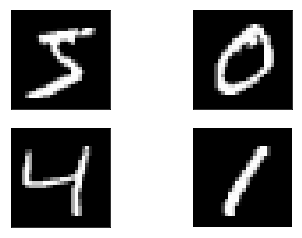

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
fig1 = plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
fig2 = plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
fig3 = plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
fig4 = plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.axis('off')
fig1.axes.get_xaxis().set_visible(False)
fig1.axes.get_yaxis().set_visible(False)
fig2.axes.get_xaxis().set_visible(False)
fig2.axes.get_yaxis().set_visible(False)
fig3.axes.get_xaxis().set_visible(False)
fig3.axes.get_yaxis().set_visible(False)
fig4.axes.get_xaxis().set_visible(False)
fig4.axes.get_yaxis().set_visible(False)
# show the plot
plt.show()

In [5]:
# Callback to Lesson 1

#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)


In [6]:
# input image dimensions
img_rows, img_cols = 28, 28

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Save test ground truth for the confusion matrix
y_true=y_test

# convert class vectors to binary class matrices
# "One-Hot-Encoding"
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 name="conv1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="conv2"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 13s 215us/step - loss: 0.3305 - acc: 0.9006 - val_loss: 0.0812 - val_acc: 0.9749

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 10s 172us/step - loss: 0.1179 - acc: 0.9652 - val_loss: 0.0576 - val_acc: 0.9816

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 10s 173us/step - loss: 0.0898 - acc: 0.9734 - val_loss: 0.0489 - val_acc: 0.9836

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 10s 172us/step - loss: 0.0761 - acc: 0.9771 - val_loss: 0.0399 - val_acc: 0.9863

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 10s 172us/step - loss: 0.0678 - acc: 0.9803 - val_loss: 0.0382 - val_acc: 0.9872



In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.038202883257926444
Test accuracy: 0.9872


In [15]:
def getfeaturemaps(model, layer_idx, x_batch):
    get_activations = K.function([model.layers[0].input,
                                  K.learning_phase()],
                                [model.layers[layer_idx].output,])
    activations = get_activations([x_batch, 0])
    return activations

In [16]:
layer_num = 3
filter_num = 0

test_image = x_test[0]
test_image = np.expand_dims(test_image, axis=0)

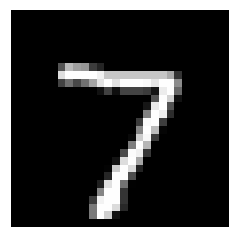

In [17]:
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()

fig1 = plt.imshow(x_test2[0], cmap=plt.get_cmap('gray'))
plt.axis('off')
fig1.axes.get_xaxis().set_visible(False)
fig1.axes.get_yaxis().set_visible(False)
# show the plot
plt.show()

In [18]:
activations = getfeaturemaps(model, int(layer_num), test_image)

print(np.shape(activations))
feature_maps = activations[0][0]

(1, 1, 12, 12, 64)


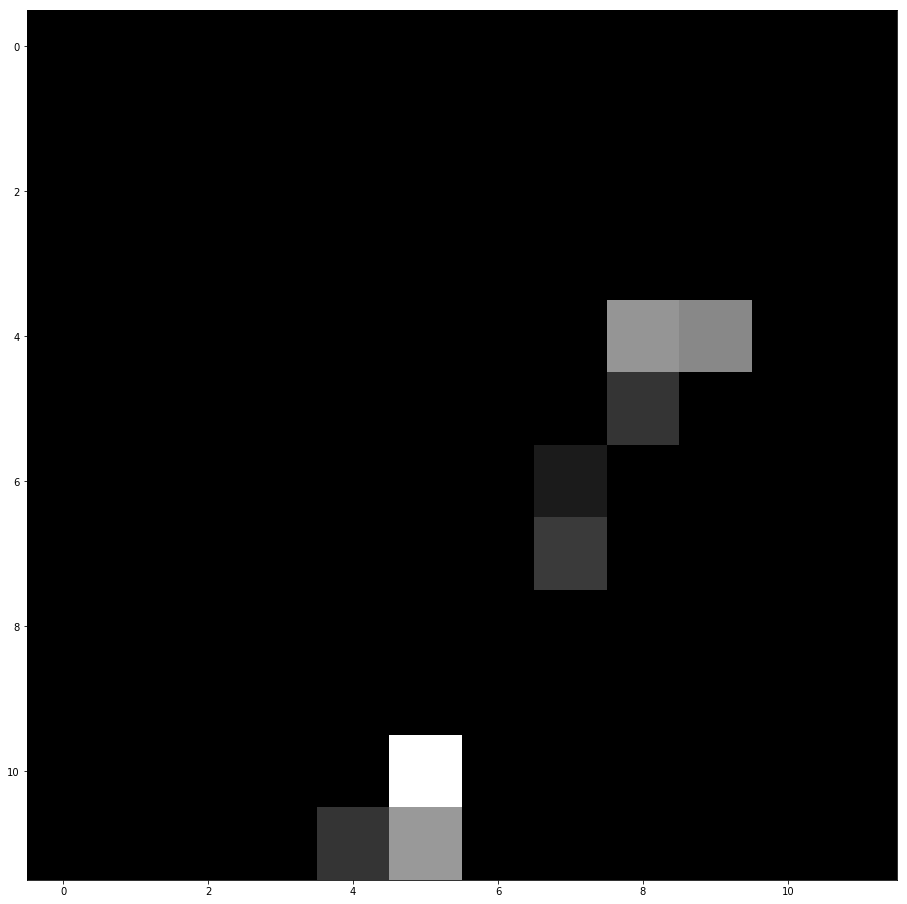

In [19]:
fig = plt.figure(figsize=(16, 16))
plt.imshow(feature_maps[:,:,filter_num], cmap='gray')
# plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num) + ".jpg")

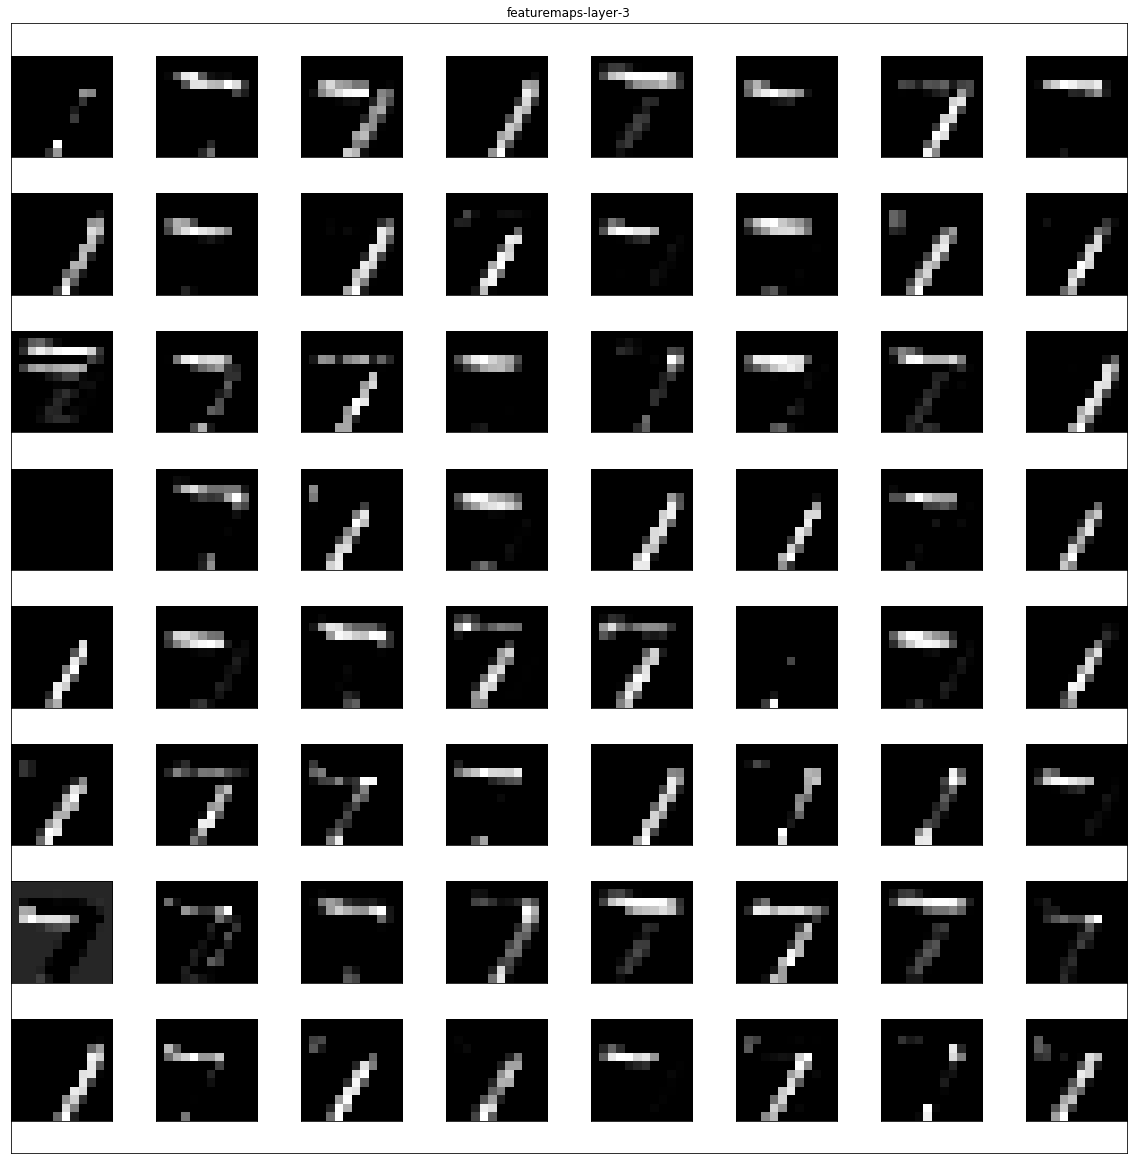

In [20]:
num_of_featuremaps = feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))

for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.tight_layout()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [21]:
# Predict the non trained examples
y_pred = model.predict_classes(x_test)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

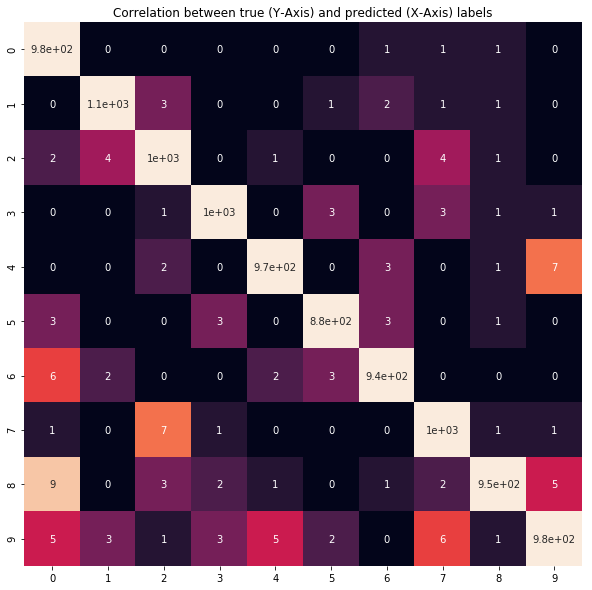

In [22]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,10))
plt.title('Correlation between true (Y-Axis) and predicted (X-Axis) labels')
sn.heatmap(df_cm, annot=True, vmin=0, vmax=10, cbar=False)

In [23]:
# Assign correct and incorrect examples
correct_indices = np.nonzero(y_pred == y_true)[0]
incorrect_indices = np.nonzero(y_pred != y_true)[0]

In [24]:
# Reshape flat image to 2D image again
x_test = x_test.reshape(10000, 28,28)

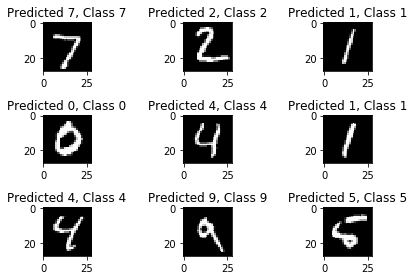

In [25]:
#plotting graph of correct predicted test data
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[correct], y_true[correct]))
plt.tight_layout()
plt.show()

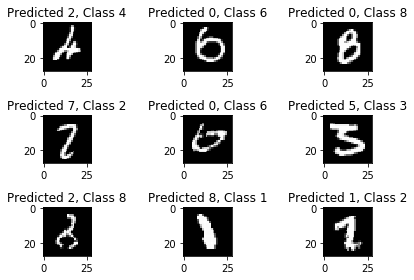

In [26]:
#plotting graph of incorrect predicted test data
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[incorrect], y_true[incorrect]))
plt.tight_layout()
plt.show()